In [1]:
# %matplotlib inline # uncomment this magic if the plots are not displayed inline by default
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pyplot API (stateless)

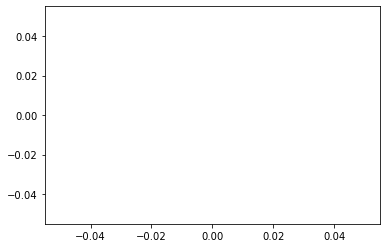

In [2]:
plt.plot()
plt.show() # plt.plot(); is the alternative. With ';' or plt.show() we get a clean output - only the graph itself.

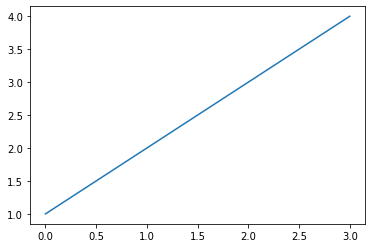

In [3]:
plt.plot([1, 2, 3, 4]);

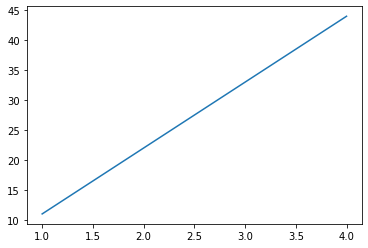

In [4]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y);

# Object-oriented API - 3 methods of creating a figure and axes

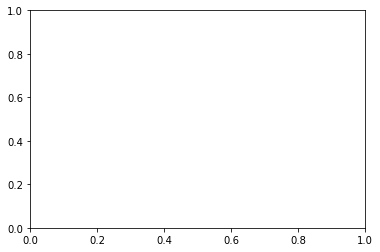

In [5]:
# 1st method
fig = plt.figure() # create a figure
ax = fig.add_subplot() # create an axis
plt.show()

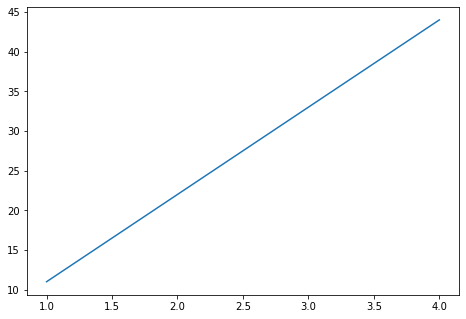

In [6]:
# 2nd method
fig = plt.figure() # create a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

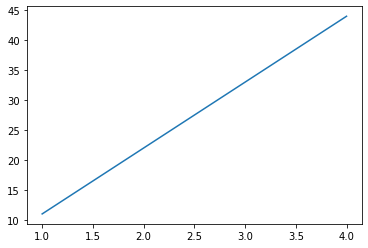

In [7]:
# 3rd method (recommended)

fig, ax = plt.subplots() # this line resets the figure
ax.plot(x, y);

# Sample workflow

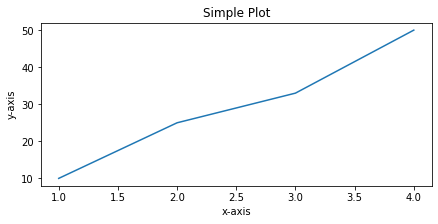

In [8]:
# import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [10, 25, 33, 50]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(7, 3)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title='Simple Plot',
      xlabel='x-axis',
      ylabel='y-axis')

# 5. Save & show
fig.savefig('plots/sample-plot.png') # if saving, no need to write plt.show(), it'll be shown inline!

# Common plots with NumPy arrays
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [9]:
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

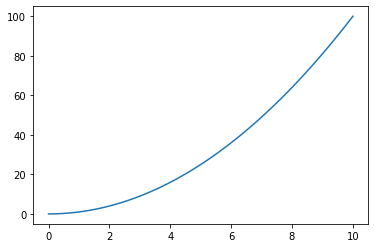

In [10]:
fig, ax = plt.subplots()
ax.plot(x, x**2);

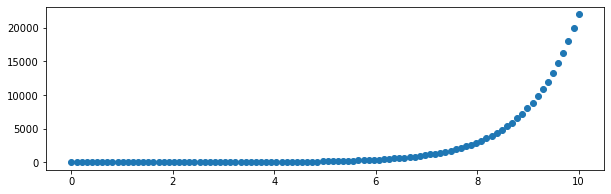

In [11]:
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(x, np.exp(x));

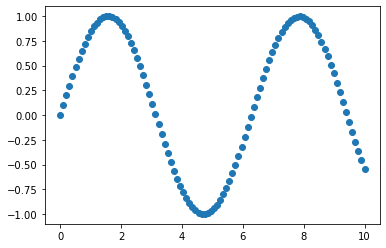

In [12]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

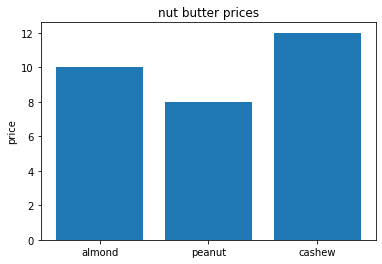

In [13]:
butter_prices = {'almond': 10, 
                 'peanut': 8,
                 'cashew': 12}

fig, ax = plt.subplots()
ax.bar(butter_prices.keys(), butter_prices.values())
ax.set(title='nut butter prices',
      ylabel='price');

<BarContainer object of 3 artists>

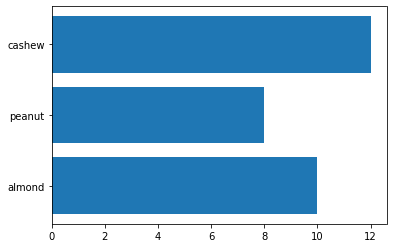

In [14]:
fig, ax = plt.subplots()
ax.barh(list(butter_prices.keys()), list(butter_prices.values()))

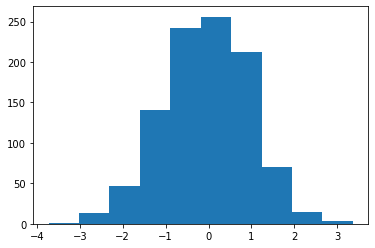

In [15]:
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

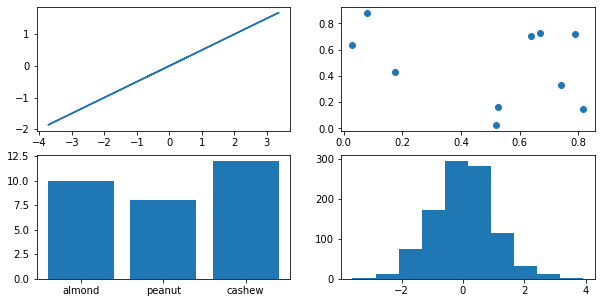

In [16]:
# Option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(butter_prices.keys(), butter_prices.values())
ax4.hist(np.random.randn(1000));

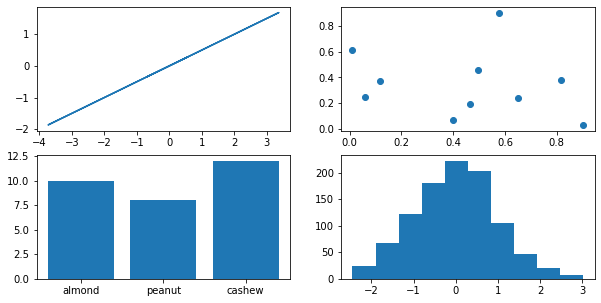

In [17]:
# Option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot to each different index
ax[0,0].plot(x, x/2)
ax[0,1].scatter(np.random.random(10), np.random.random(10))
ax[1,0].bar(butter_prices.keys(), butter_prices.values())
ax[1,1].hist(np.random.randn(1000));

# Plotting from pandas DataFrame - pyplot method

In [18]:
car_sales = pd.read_csv('car-sales.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [19]:
# replace unneeded characters, then remove two last zeroes
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '', regex=True).str[:-2].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [20]:
car_sales['Sale Date'] = pd.date_range('1/1/2020', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [21]:
car_sales['Total Sales'] = car_sales['Price'].cumsum() # cumulative sum
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


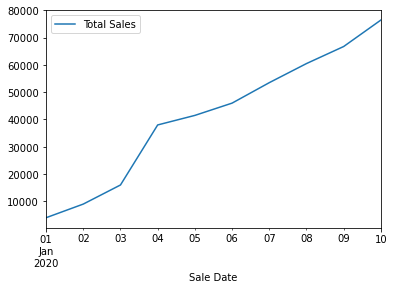

In [22]:
car_sales.plot(x='Sale Date', y='Total Sales');

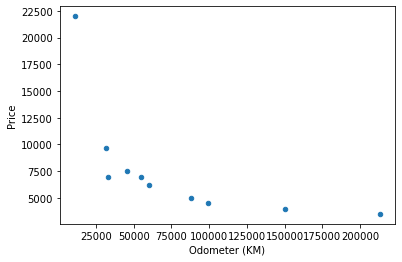

In [23]:
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter');

### Bar plot with groups of bars

In [24]:
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.967764,0.998826,0.105063,0.984081
1,0.068650,0.026627,0.844072,0.494814
2,0.701985,0.124458,0.401548,0.791038
3,0.269848,0.676510,0.813687,0.513425
4,0.280307,0.357405,0.497324,0.120308
5,0.276663,0.386102,0.805590,0.348663
6,0.122654,0.685127,0.267080,0.888175
7,0.532536,0.600528,0.102220,0.430851
8,0.988051,0.261542,0.493844,0.775770
9,0.358958,0.488661,0.122718,0.274574


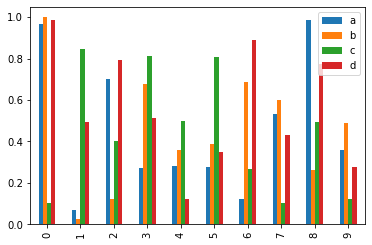

In [25]:
df.plot.bar(); # same thing: df.plot(kind='bar')

### Interchangeable notations: DataFrame.plot(x, y, kind='bar') and DataFrame.plot.bar(x, y)

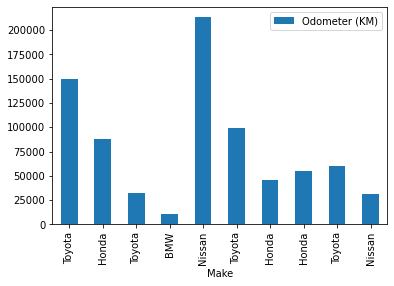

In [26]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar'); # same as car_sales.plot.bar(x='Make', y='Odometer (KM)')

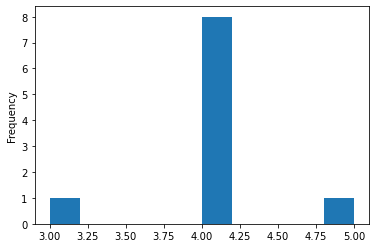

In [27]:
# Histogram - visualizing distribution

car_sales['Doors'].plot.hist(); # same thing: car_sales['Doors'].plot(kind='hist')

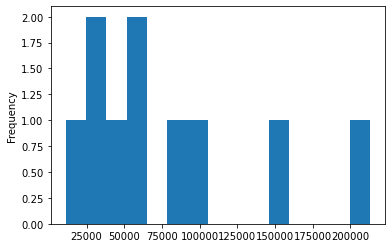

In [28]:
# Change the number of groups the data is split into (bins)

car_sales['Odometer (KM)'].plot.hist(bins=15); # default is 10

### Heart disease dataset

In [29]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


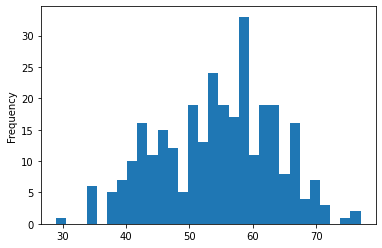

In [30]:
heart_disease['age'].plot.hist(bins=30);

# Plotting from pandas DataFrame - object-oriented method

In [31]:
over_50 = heart_disease[heart_disease['age'] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


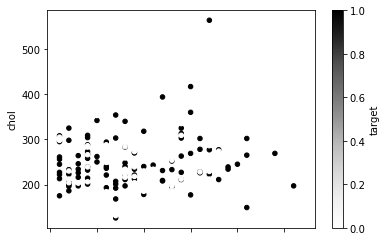

In [32]:
# pyplot method
over_50.plot(x='age', y='chol', c='target', kind='scatter');

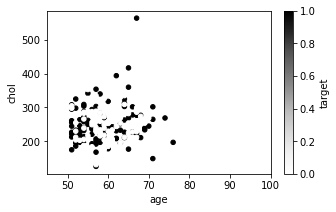

In [33]:
# mix pyplot and OO method
fig, ax = plt.subplots(figsize=(5, 3))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax)
ax.set_xlim([45, 100]);

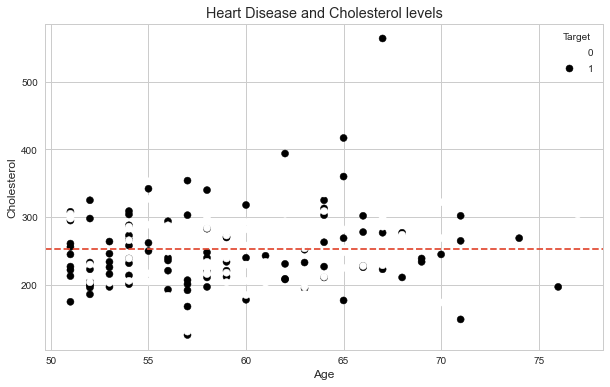

In [75]:
# pure OO method
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x=over_50['age'],
                    y=over_50['chol'],
                    c=over_50['target']) # c for color

ax.set(title='Heart Disease and Cholesterol levels',
      xlabel='Age',
      ylabel='Cholesterol')

ax.legend(*scatter.legend_elements(), title='Target')

ax.axhline(over_50['chol'].mean(),
          linestyle='--');

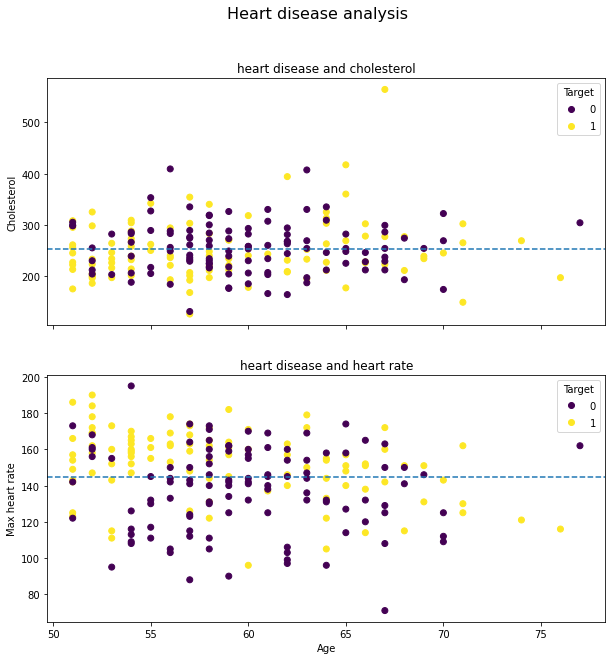

In [62]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, 
                               figsize=(10,10),
                              sharex=True)
fig.suptitle('Heart disease analysis', fontsize=16)


# Age/Cholesterol
scatter = ax0.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'])

ax0.set(title='heart disease and cholesterol',
       #xlabel='Age',
       ylabel='Cholesterol')

ax0.legend(*scatter.legend_elements(), title='Target')
ax0.axhline(y=over_50['chol'].mean(),
           linestyle='--')

# Age/Heart rate
scatter = ax1.scatter(x=over_50['age'],
                            y=over_50['thalach'],
                            c=over_50['target'])

ax1.set(title='heart disease and heart rate',
       xlabel='Age',
       ylabel='Max heart rate')

ax1.legend(*scatter.legend_elements(), title='Target')
ax1.axhline(y=over_50['thalach'].mean(),
          linestyle='--')

# Changing plot style: plt.style.use('...')

In [63]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

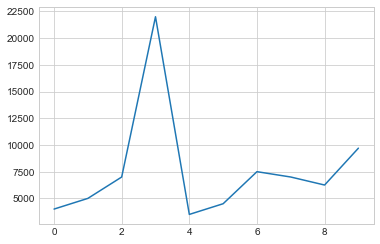

In [67]:
plt.style.use('seaborn-whitegrid')
car_sales['Price'].plot();

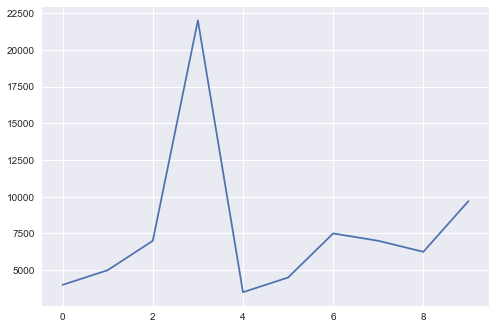

In [68]:
plt.style.use('seaborn')
car_sales['Price'].plot();

<AxesSubplot:xlabel='Odometer (KM)', ylabel='Price'>

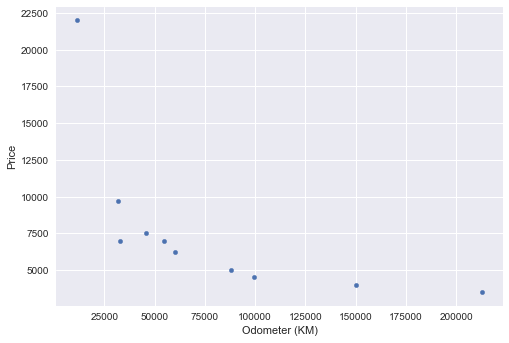

In [69]:
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter')

<AxesSubplot:>

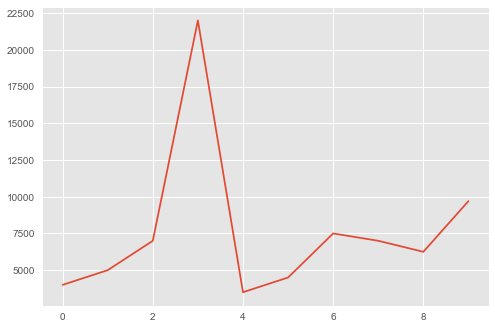

In [70]:
plt.style.use('ggplot')
car_sales['Price'].plot()

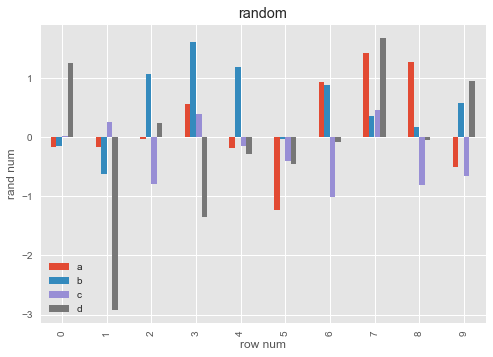

In [73]:
x = np.random.randn(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
ax = df.plot(kind='bar')
ax.set(title='random', xlabel='row num', ylabel='rand num')
ax.legend().set_visible(True)

# Set x and y limits, save the plot

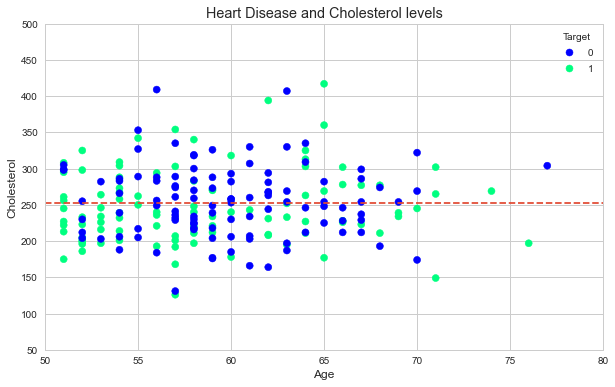

In [88]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x=over_50['age'],
                    y=over_50['chol'],
                    c=over_50['target'], # c for color
                    cmap='winter') # customize colors

ax.set(title='Heart Disease and Cholesterol levels',
      xlabel='Age',
      ylabel='Cholesterol',
      xlim=[50, 80],
      ylim=[50, 500])

ax.legend(*scatter.legend_elements(), title='Target')

ax.axhline(over_50['chol'].mean(),
          linestyle='--');

fig.savefig('plots/heart-disease.png', dpi=300)